<h1>Unit06 K-Means clustering on iris data</h1>

<h2>Import libraries</h2>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2>Load Data From CSV File</h2>

In [6]:
iris_df = pd.read_csv("data/Unit06 iris.csv")
iris_df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [7]:
# In the task we're told that there are 3 species, "setosa, versicolour, and verginica" but let's make sure

# List unique values in the 'species' column
unique_species = iris_df['species'].unique()

# Print the unique values
print(unique_species)

['setosa' 'versicolor' 'virginica']


In [9]:
# convert 'setosa' to 1, 'versicolor' to 2, 'virginica' to 3

# Create a mapping dictionary
species_mapping = {'setosa': 1, 'versicolor': 2, 'virginica': 3}

# Create the new column 'species_num' by mapping values from 'species' column
iris_df['species_num'] = iris_df['species'].map(species_mapping)

# Print the DataFrame to verify the changes
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width species  species_num
0           5.1          3.5           1.4          0.2  setosa            1
1           4.9          3.0           1.4          0.2  setosa            1
2           4.7          3.2           1.3          0.2  setosa            1
3           4.6          3.1           1.5          0.2  setosa            1
4           5.0          3.6           1.4          0.2  setosa            1


In [10]:
# drop the species column
iris_df.drop(columns=['species'], inplace=True)

# Print the DataFrame to verify the changes
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width  species_num
0           5.1          3.5           1.4          0.2            1
1           4.9          3.0           1.4          0.2            1
2           4.7          3.2           1.3          0.2            1
3           4.6          3.1           1.5          0.2            1
4           5.0          3.6           1.4          0.2            1


In [13]:
#Frequency distribution of species"
freq_dist = pd.crosstab(index=iris_df["species_num"],  # Make a crosstab
                              columns="count")      # Name the count column
freq_dist

col_0        count
species_num       
1               50
2               50
3               50

In [11]:
# Normalize using the code in the demo notebook:

from sklearn.preprocessing import StandardScaler
X = iris_df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.03205722e+00, -1.34127240e+00, -1.31297673e+00,
        -1.22474487e+00],
       [-1.24957601e-01, -1.34127240e+00, -1.31297673e+00,
        -1.22474487e+00],
       [ 3.37848329e-01, -1.39813811e+00, -1.31297673e+00,
        -1.22474487e+00],
       [ 1.06445364e-01, -1.28440670e+00, -1.31297673e+00,
        -1.22474487e+00],
       [ 1.26346019e+00, -1.34127240e+00, -1.31297673e+00,
        -1.22474487e+00],
       [ 1.95766909e+00, -1.17067529e+00, -1.05003079e+00,
        -1.22474487e+00],
       [ 8.00654259e-01, -1.34127240e+00, -1.18150376e+00,
        -1.22474487e+00],
       [ 8.00654259e-01, -1.28440670e+00, -1.31297673e+00,
        -1.22474487e+00],
       [-3.56360566e-01, -1.34127240e+00, -1.31297673e+00,
        -1.22474487e+00],
       [ 1.06445364e-01, -1.28440670e+00, -1.44444970e+00,
        -1.22474487e+00],
       [ 1.49486315e+00, -1.28440670e+00, -1.31297673e+00,
        -1.22474487e+00],
       [ 8.00654259e-01, -1.22754100e+00, -1.31297673e+00,
      

In [15]:
# where's the elbow?
from sklearn.cluster import KMeans
wcss = []

x = iris_df.iloc[:, [0, 1, 2, 3]].values

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\cbutt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cbutt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cbutt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cbutt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

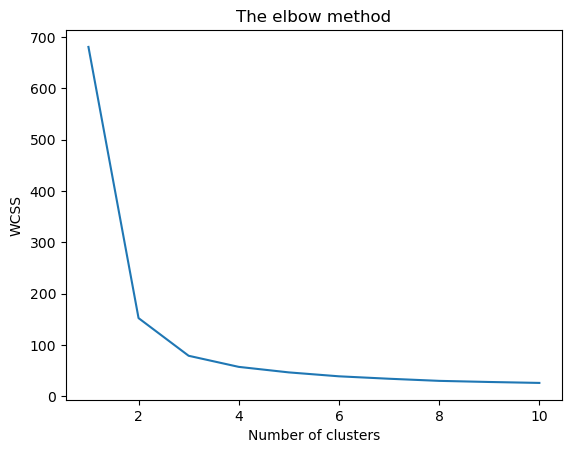

In [18]:

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [19]:
# 2 looks like an elbow but we already know there are 3 species, so k needs to be 3

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

C:\Users\cbutt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<h2>2D Scatterplot with clusters and centroids</h2>

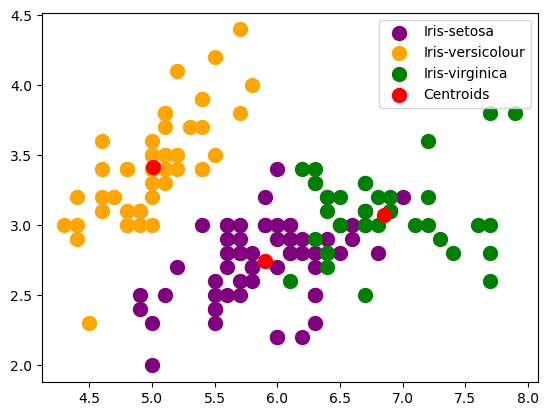

In [22]:
# I'm getting a bit fed up with this memory leak!
# plot clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

<h2>3D Scatterplot with clusters and centroids</h2>

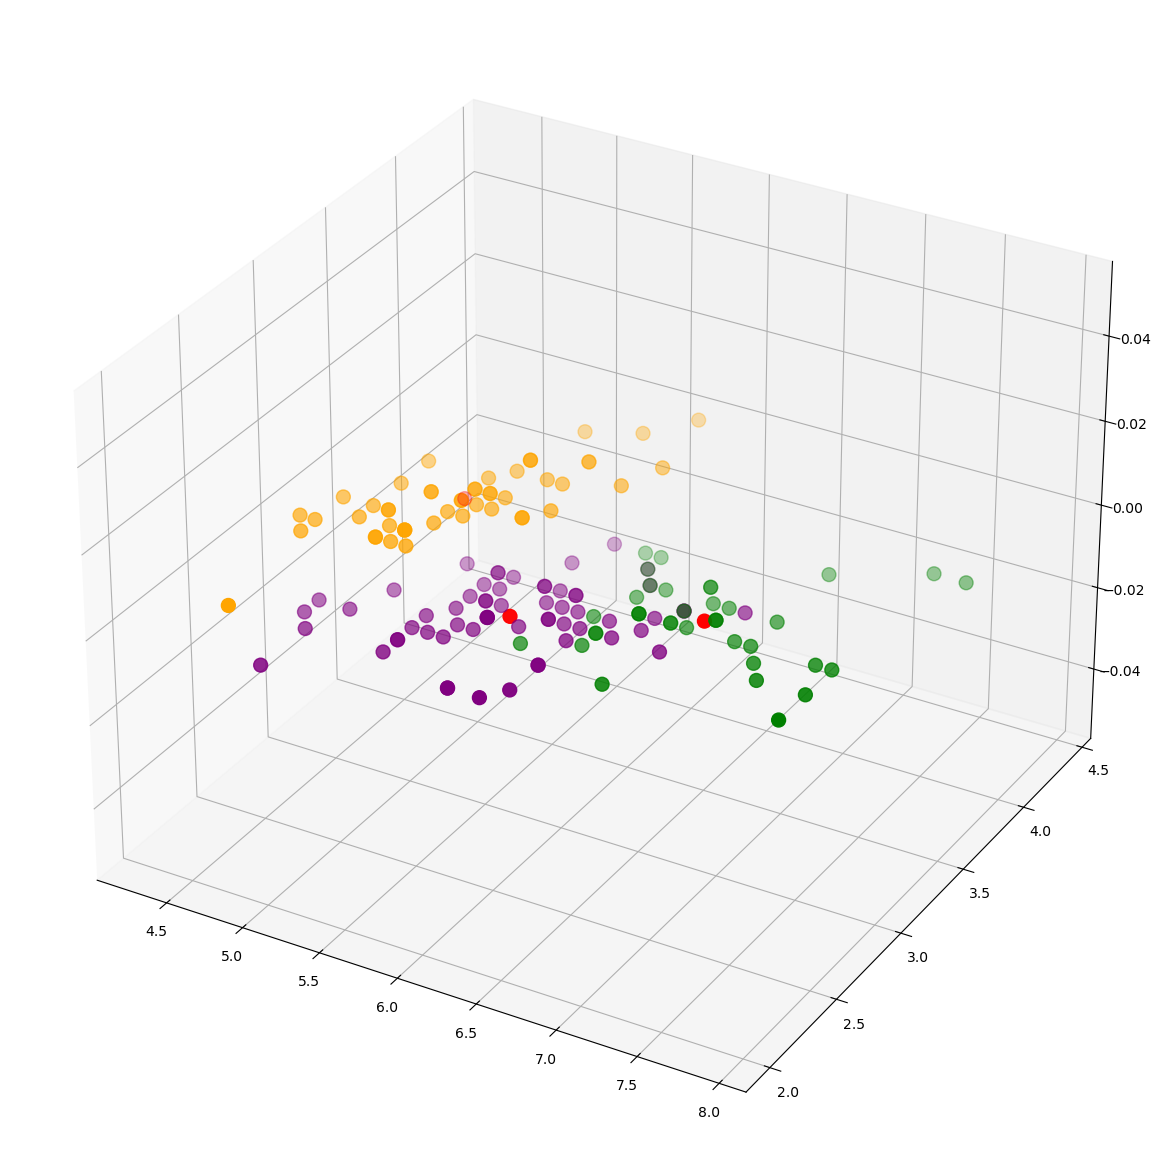

In [23]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()